# Visualizing co-occuring genes after Apriori in (clus1, clus2, clus3) interaction networks by NetworkX

In [1]:
##STEP 1.1: Import required python libraries (matplotlib, pandas, numpy).

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm # graph_colormap
import seaborn as sns

# https://towardsdatascience.com/visualizing-protein-networks-in-python-58a9b51be9d5
### The required libraries and packages ###
import networkx as nx
import requests

## STEP 1: Open file from AR mining

In [4]:
# open binary interacting genes (clus1,2,3) file
df11=pd.read_excel("./output/2.2_PasteALLrules_24Oct22.xlsx",sheet_name='Sheet 1_clus1',header=1)
df12=pd.read_excel("./output/2.2_PasteALLrules_24Oct22.xlsx",sheet_name='Sheet 2_clus2',header=1)
df13=pd.read_excel("./output/2.2_PasteALLrules_24Oct22.xlsx",sheet_name='Sheet 3_clus3',header=1)

df11.head(3)

Node_A Node_B   support  confidence  coverage      lift  count
0   RYR2   KRAS  0.455556    1.000000  0.455556  1.022727     41
1   TP53   KRAS  0.433333    1.000000  0.433333  1.022727     39
2    ATM   KRAS  0.222222    0.909091  0.244444  0.929752     20

In [5]:
# Create dataframe with the preferred names of the two proteins and the score of the interaction
interact_c1 = df11[['Node_A', 'Node_B', 'support','confidence']]  
interact_c2 = df12[['Node_A', 'Node_B', 'support','confidence']]   
interact_c3 = df13[['Node_A', 'Node_B', 'support','confidence']]  

interact_c1.head(3)

Node_A Node_B   support  confidence
0   RYR2   KRAS  0.455556    1.000000
1   TP53   KRAS  0.433333    1.000000
2    ATM   KRAS  0.222222    0.909091

## STEP 2: Creating the Network

In [8]:
G1=nx.Graph(name='Co-occuring genes_clus1 Graph')
interact_c1 = np.array(interact_c1)

for i in range(len(interact_c1)):  ##range(len(interact_c1)) = range(0, 41)
    interact_c1_A = interact_c1[i]
    a = interact_c1_A[0] # gene a node
    b = interact_c1_A[1] # gene b node
    w = interact_c1_A[2] # support score as weighted edge where high scores = low weight
    c = interact_c1_A[3] # confident scores 
    G1.add_edge(a, b, weight=w, conf=c) # add weighted edge to graph
                                        # Associate data to edges using keywords
        
# Ref: https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.add_edge.html
# Here is some basic information about the graph using nx.info(G):
print(nx.info(G1))

Name: Co-occuring genes_clus1 Graph
Type: Graph
Number of nodes: 24
Number of edges: 41
Average degree:   3.4167


In [9]:
G2=nx.Graph(name='Co-occuring genes_clus2 Graph')
interact_c2 = np.array(interact_c2)

for i in range(len(interact_c2)):  ##range(len(interact_c2)) = range(0, 54)
    interact_c2_A = interact_c2[i]
    a = interact_c2_A[0] # gene a node
    b = interact_c2_A[1] # gene b node
    w = interact_c2_A[2] # support score as weighted edge where high scores = low weight
    c = interact_c2_A[3] # confident scores 
    G2.add_edge(a, b, weight=w, conf=c) # add weighted edge to graph
                                        # Associate data to edges using keywords
        
# Ref: https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.add_edge.html
# Here is some basic information about the graph using nx.info(G):
print(nx.info(G2))

Name: Co-occuring genes_clus2 Graph
Type: Graph
Number of nodes: 32
Number of edges: 54
Average degree:   3.3750


In [10]:
G3=nx.Graph(name='Co-occuring genes_clus3 Graph')
interact_c3 = np.array(interact_c3)

for i in range(len(interact_c3)):  ##range(len(interact_c3)) = range(0, 58)
    interact_c3_A = interact_c3[i]
    a = interact_c3_A[0] # gene a node
    b = interact_c3_A[1] # gene b node
    w = interact_c3_A[2] # support score as weighted edge where high scores = low weight
    c = interact_c3_A[3] # confident scores 
    G3.add_edge(a, b, weight=w, conf=c) # add weighted edge to graph
                                        # Associate data to edges using keywords
        
# Ref: https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.add_edge.html
# Here is some basic information about the graph using nx.info(G):
print(nx.info(G3))

Name: Co-occuring genes_clus3 Graph
Type: Graph
Number of nodes: 31
Number of edges: 58
Average degree:   3.7419


## STEP 3: Visualizing network

Betweenness centrality: https://en.wikipedia.org/wiki/Betweenness_centrality
is a measure of centrality in a graph based on shortest paths. For every pair of vertices in a connected graph, there exists at least one shortest path between the vertices such that either the number of edges that the path passes through (for unweighted graphs) or the sum of the weights of the edges (for weighted graphs) is minimized. 

In [12]:
# function to rescale list of values to range [newmin,newmax]
def rescale(l,newmin,newmax):
    arr = list(l)
    return [(x-min(arr))/(max(arr)-min(arr))*(newmax-newmin)+newmin for x in arr]

### CO gene network of cluster 1

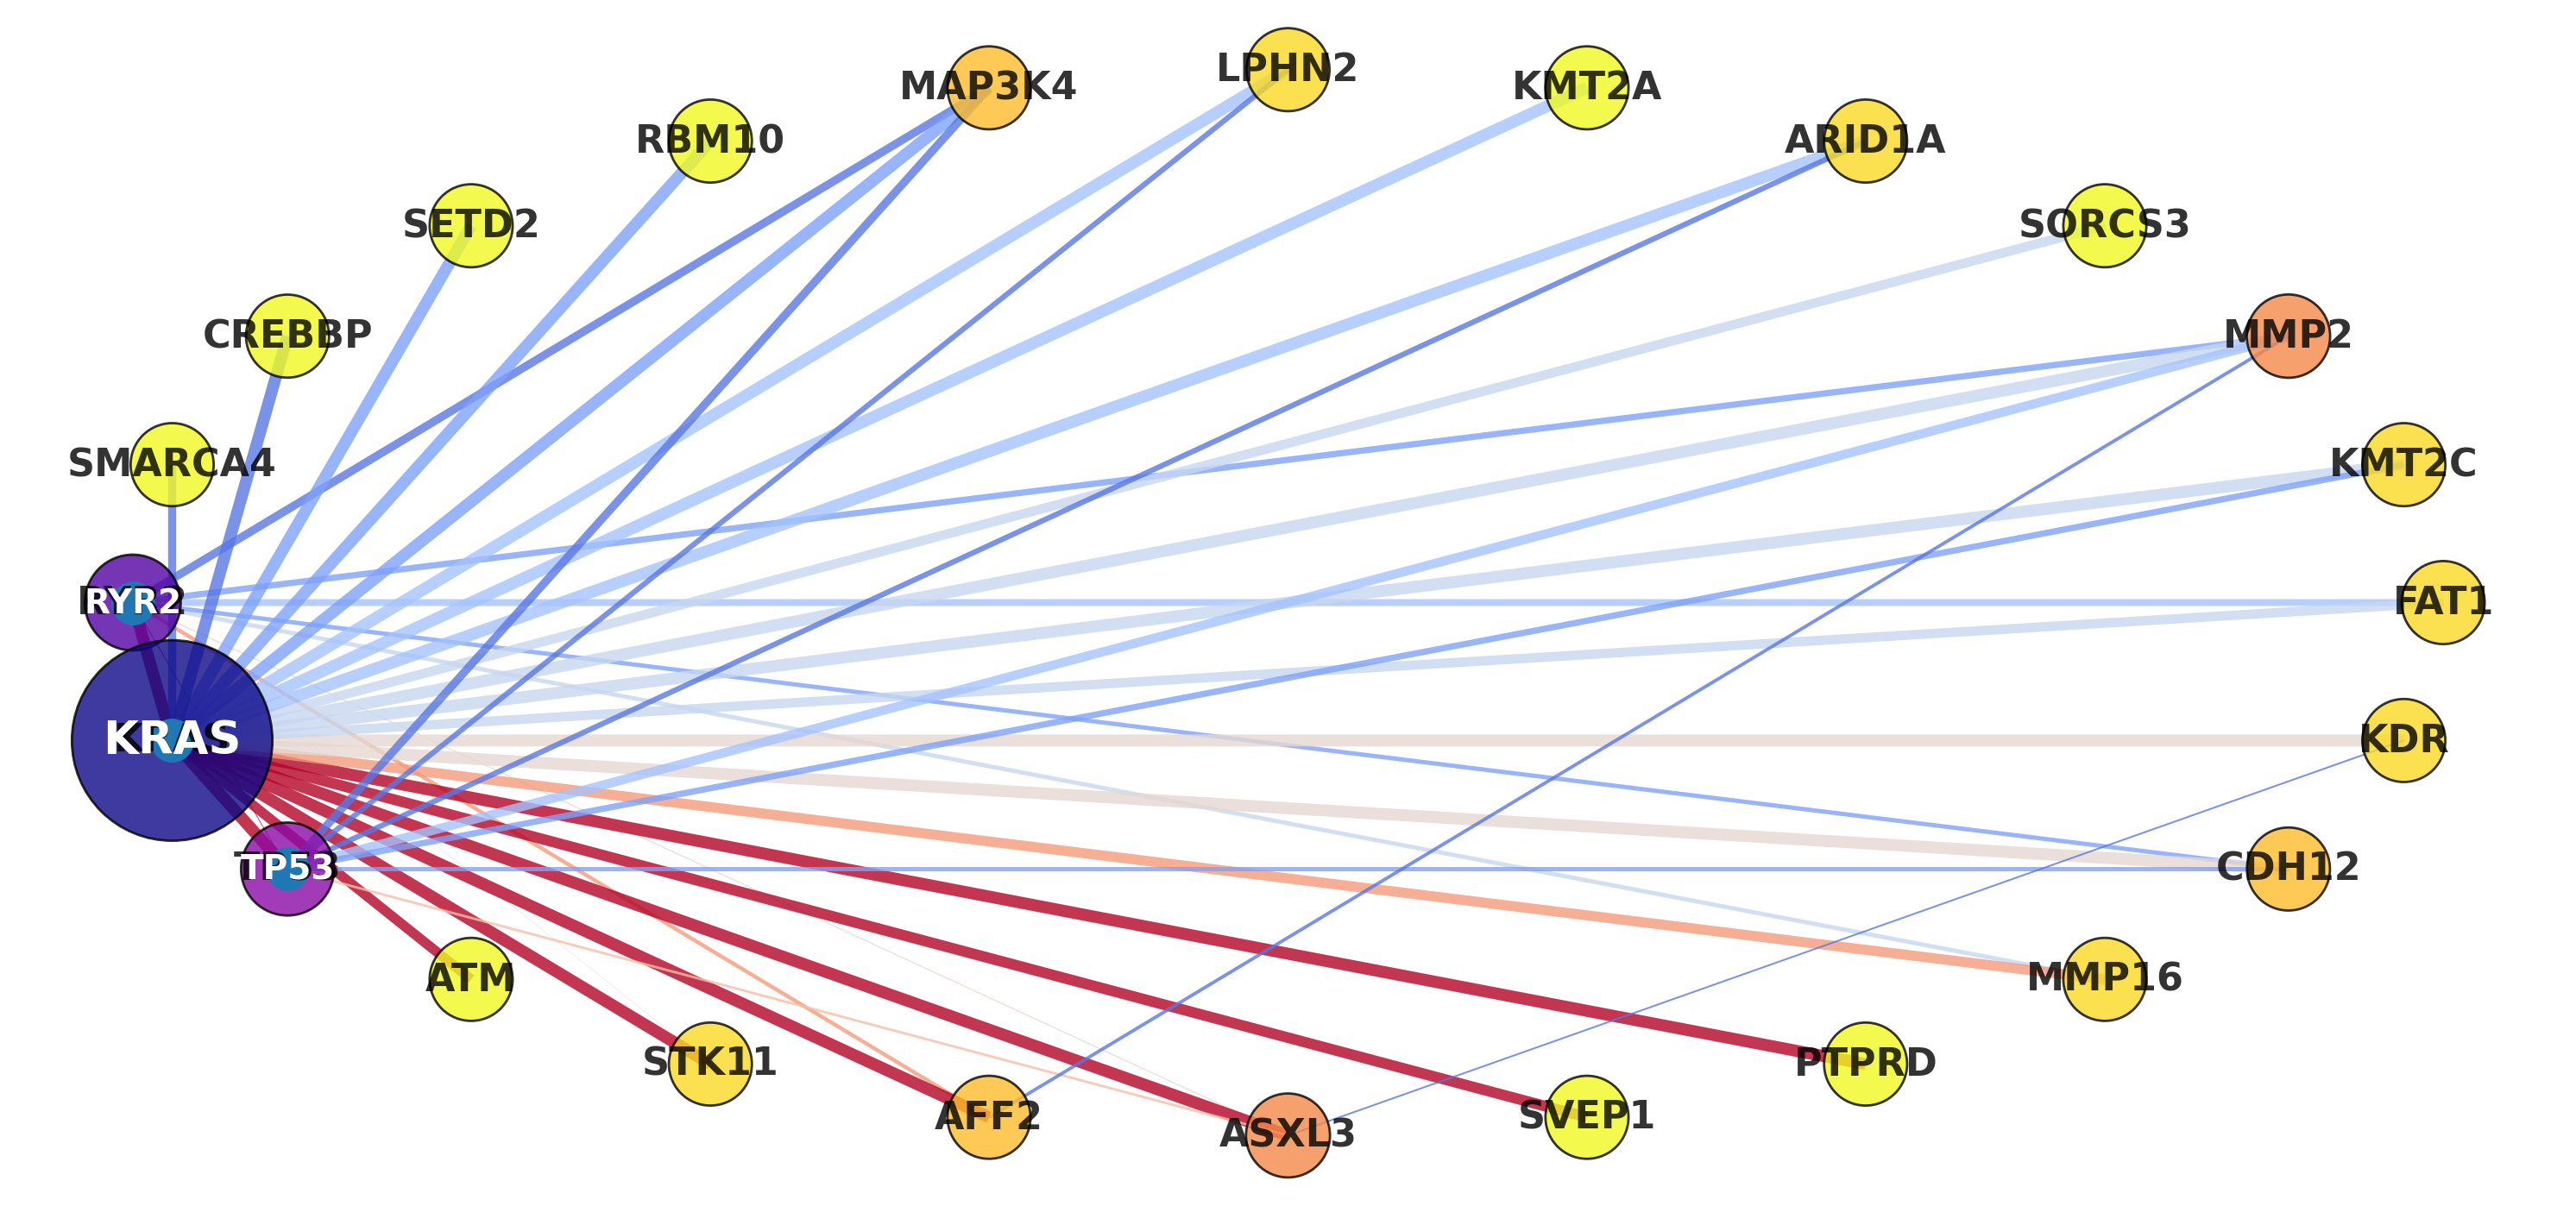

In [23]:
# use the matplotlib plasma colormap
graph_colormap1 = cm.get_cmap('plasma_r',15) #  #('viridis', 10) # no. of node degree
graph_colormap2 = cm.get_cmap('coolwarm') # support: low --> high [blue --> red]  #('seismic_r') #('coolwarm') #('gist_gray_r')

# node color varies with Degree
c = rescale([G1.degree(v) for v in G1],0,2) # v= node name, rescaled node degree to [0,0.9]
c = [graph_colormap1(i) for i in c]

# node size varies with betweeness centrality - map to range [10,100] 
bc = nx.betweenness_centrality(G1) # betweeness centrality
s =  rescale([v for v in bc.values()],1200,7000) # 1500,7000)

# edge color shows weight (= support score)
ec = rescale([float(G1[u][v]['weight']) for u,v in G1.edges],0.1,4) # 0.1,1)
ec = [graph_colormap2(i) for i in ec]

# edge width shows confident scores
ew = rescale([float(G1[u][v]['conf']) for u,v in G1.edges],0.2,5) #0.1,4)

##----------------------------
# Layout: https://networkx.org/documentation/stable/reference/drawing.html
# https://pelegm-networkx.readthedocs.io/en/latest/reference/generated/networkx.drawing.nx_pylab.draw_networkx_labels.html
# alpha = text transparent; font_family (string) – Font family (default=’sans-serif’)

pos = nx.shell_layout(G1) # circular_layout(G1) #kamada_kawai_layout(G1)
plt.figure(figsize=(19,9),facecolor='w', dpi=200) #facecolor=[0.7,0.7,0.7,0.4]
nx.draw_networkx(G1, pos=pos, with_labels=True, node_color=c, node_size=s,edge_color= ec,width=ew,
                 font_color='black',font_weight='bold',font_size='16',alpha=0.8,edgecolors='black', 
                 font_family='sans-serif') #default='sans-serif'
# draw subgraph for highlights
# Ref: https://stackoverflow.com/questions/59220877/highlight-a-node-in-draw-networkx-visualisation-without-changing-node-colour

nx.draw_networkx(G1.subgraph('KRAS'), pos=pos,font_weight='bold',font_size=19, font_color='w')
nx.draw_networkx(G1.subgraph('TP53'), pos=pos,font_weight='bold',font_size=14, font_color='w')
nx.draw_networkx(G1.subgraph('RYR2'), pos=pos,font_weight='bold',font_size=14, font_color='w')
plt.axis('off')
#plt.show()
plt.savefig("./output/CO_network_cluster1.png") # save as png

### CO gene network of cluster 2

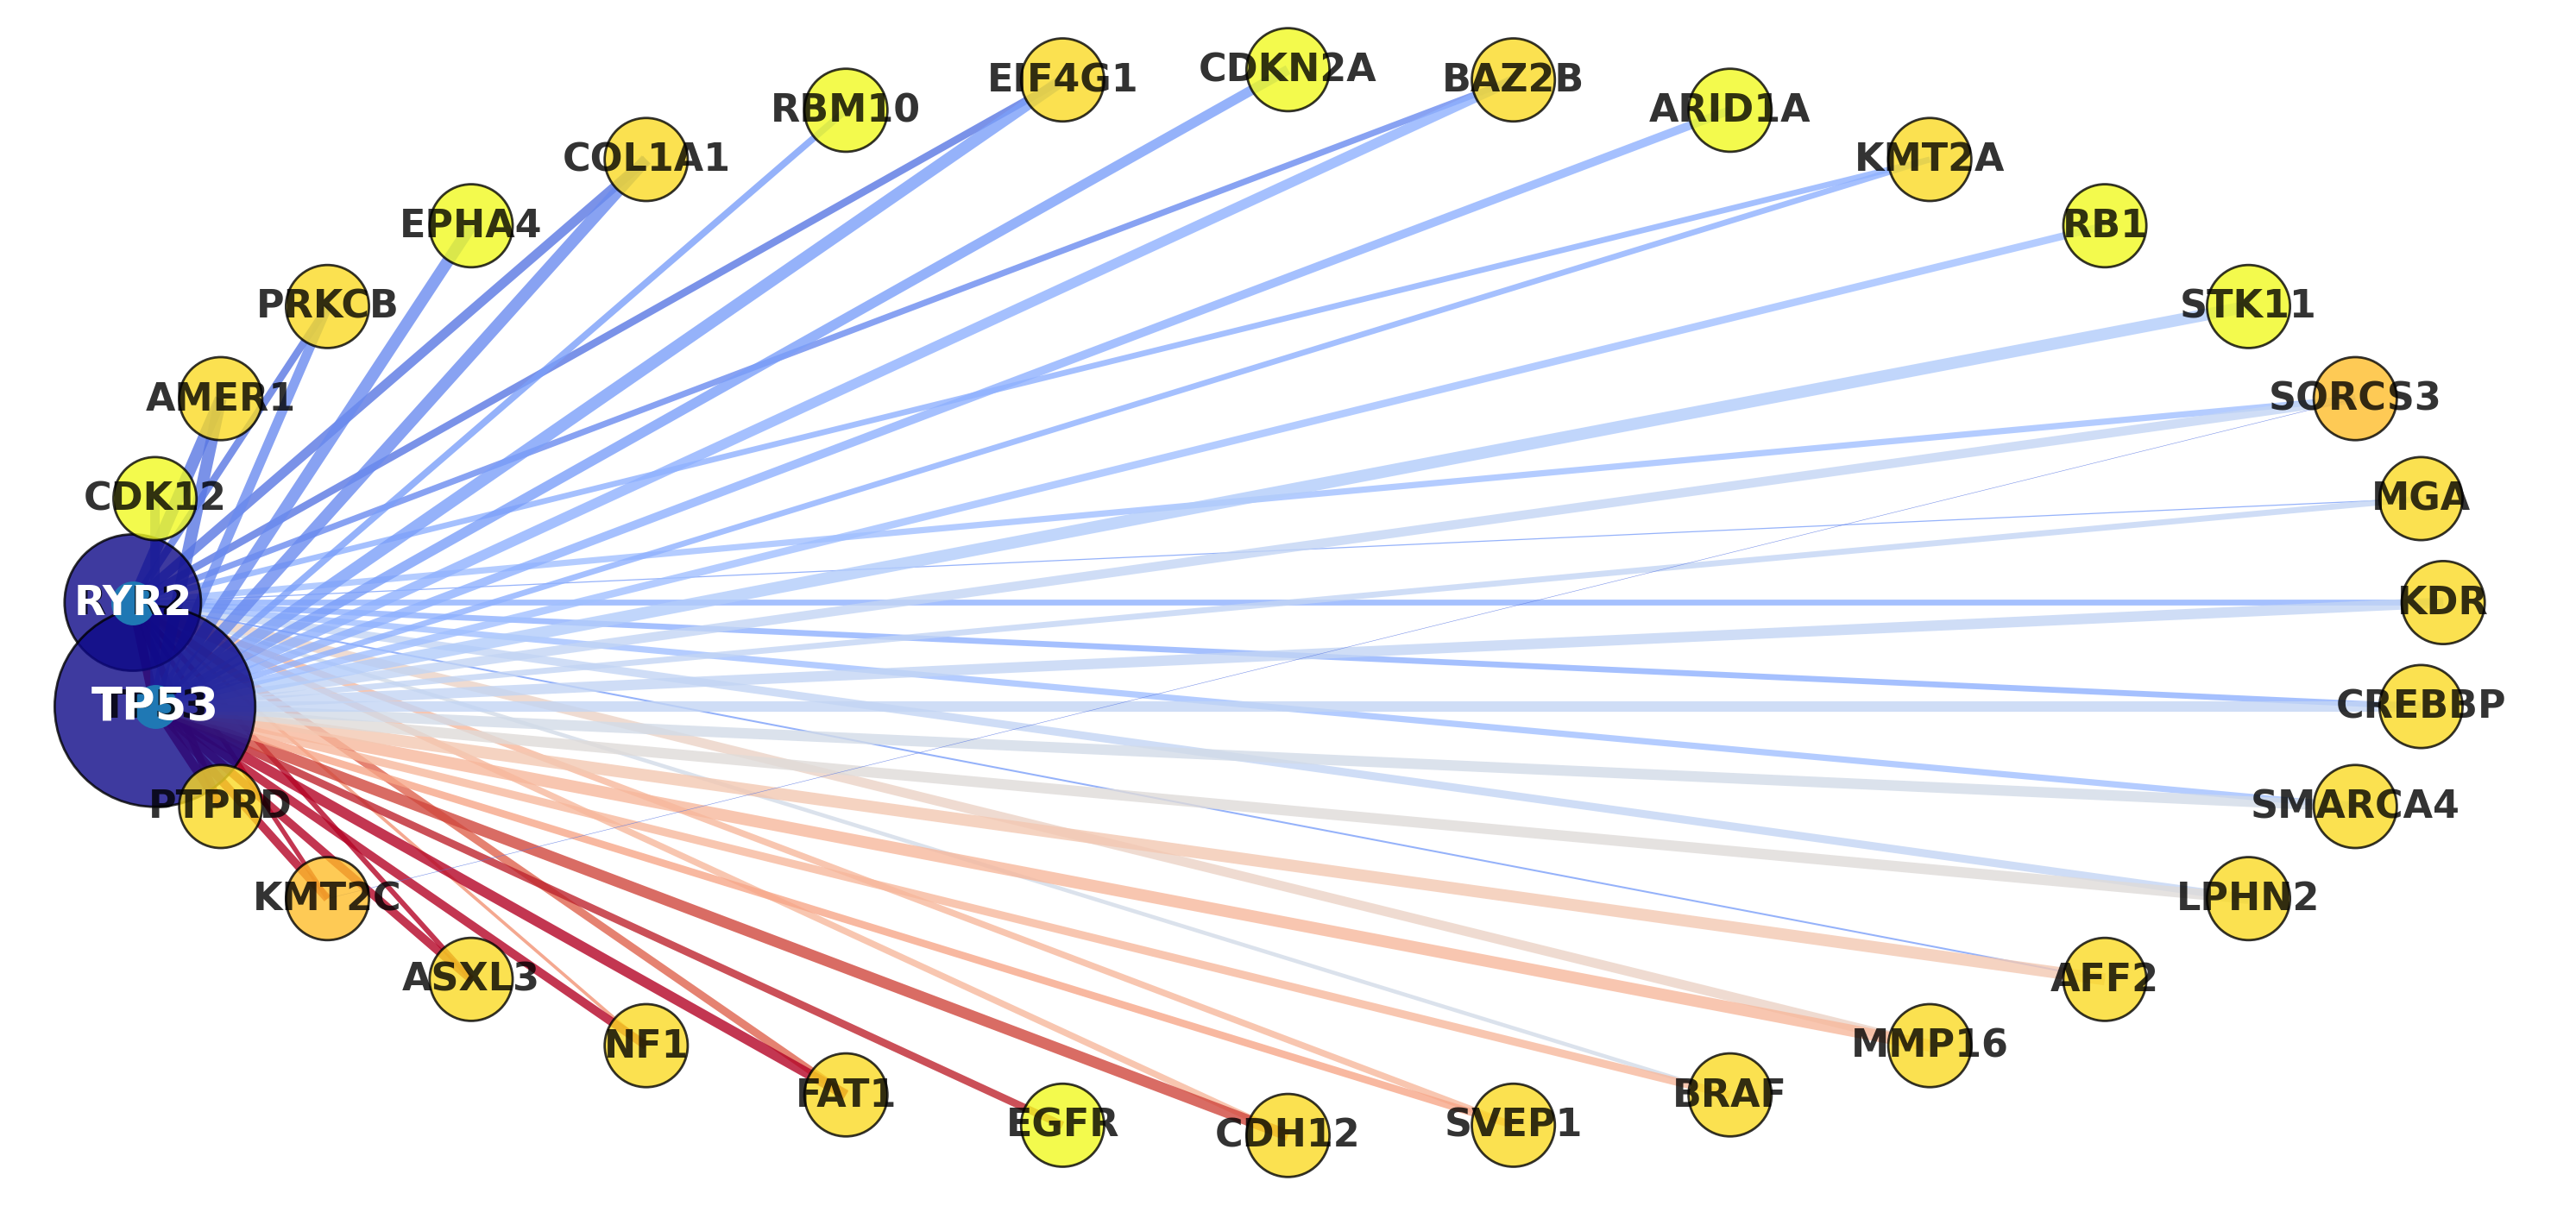

In [24]:
# use the matplotlib plasma colormap
graph_colormap1 = cm.get_cmap('plasma_r',15) #  #('viridis', 10) # no. of node degree
graph_colormap2 = cm.get_cmap('coolwarm') # support: low --> high [blue --> red]  #('seismic_r') #('coolwarm') #('gist_gray_r')

# node color varies with Degree
c = rescale([G2.degree(v) for v in G2],0,2) # v= node name, rescaled node degree to [0,0.9]
c = [graph_colormap1(i) for i in c]

# node size varies with betweeness centrality - map to range [10,100] 
bc = nx.betweenness_centrality(G2) # betweeness centrality
s =  rescale([v for v in bc.values()],1200,7000) # 1500,7000)

# edge color shows weight (= support score)
ec = rescale([float(G2[u][v]['weight']) for u,v in G2.edges],0.1,4) # 0.1,1)
ec = [graph_colormap2(i) for i in ec]

# edge width shows confident scores
ew = rescale([float(G2[u][v]['conf']) for u,v in G2.edges],0.2,5) #0.1,4)

##----------------------------
# Layout: https://networkx.org/documentation/stable/reference/drawing.html
# https://pelegm-networkx.readthedocs.io/en/latest/reference/generated/networkx.drawing.nx_pylab.draw_networkx_labels.html
# alpha = text transparent; font_family (string) – Font family (default=’sans-serif’)

pos = nx.shell_layout(G2) # circular_layout(G2) #kamada_kawai_layout(G2)
plt.figure(figsize=(19,9),facecolor='w', dpi=200) #facecolor=[0.7,0.7,0.7,0.4]
nx.draw_networkx(G2, pos=pos, with_labels=True, node_color=c, node_size=s,edge_color= ec,width=ew,
                 font_color='black',font_weight='bold',font_size='16',alpha=0.8,edgecolors='black', 
                 font_family='sans-serif') #default='sans-serif'
# draw subgraph for highlights
# Ref: https://stackoverflow.com/questions/59220877/highlight-a-node-in-draw-networkx-visualisation-without-changing-node-colour

nx.draw_networkx(G2.subgraph('TP53'), pos=pos,font_weight='bold',font_size=19, font_color='w')
nx.draw_networkx(G2.subgraph('RYR2'), pos=pos,font_weight='bold',font_size=17, font_color='w')
plt.axis('off')
#plt.show()
plt.savefig("./output/CO_network_cluster2.png") # save as png

### CO gene network of cluster 3

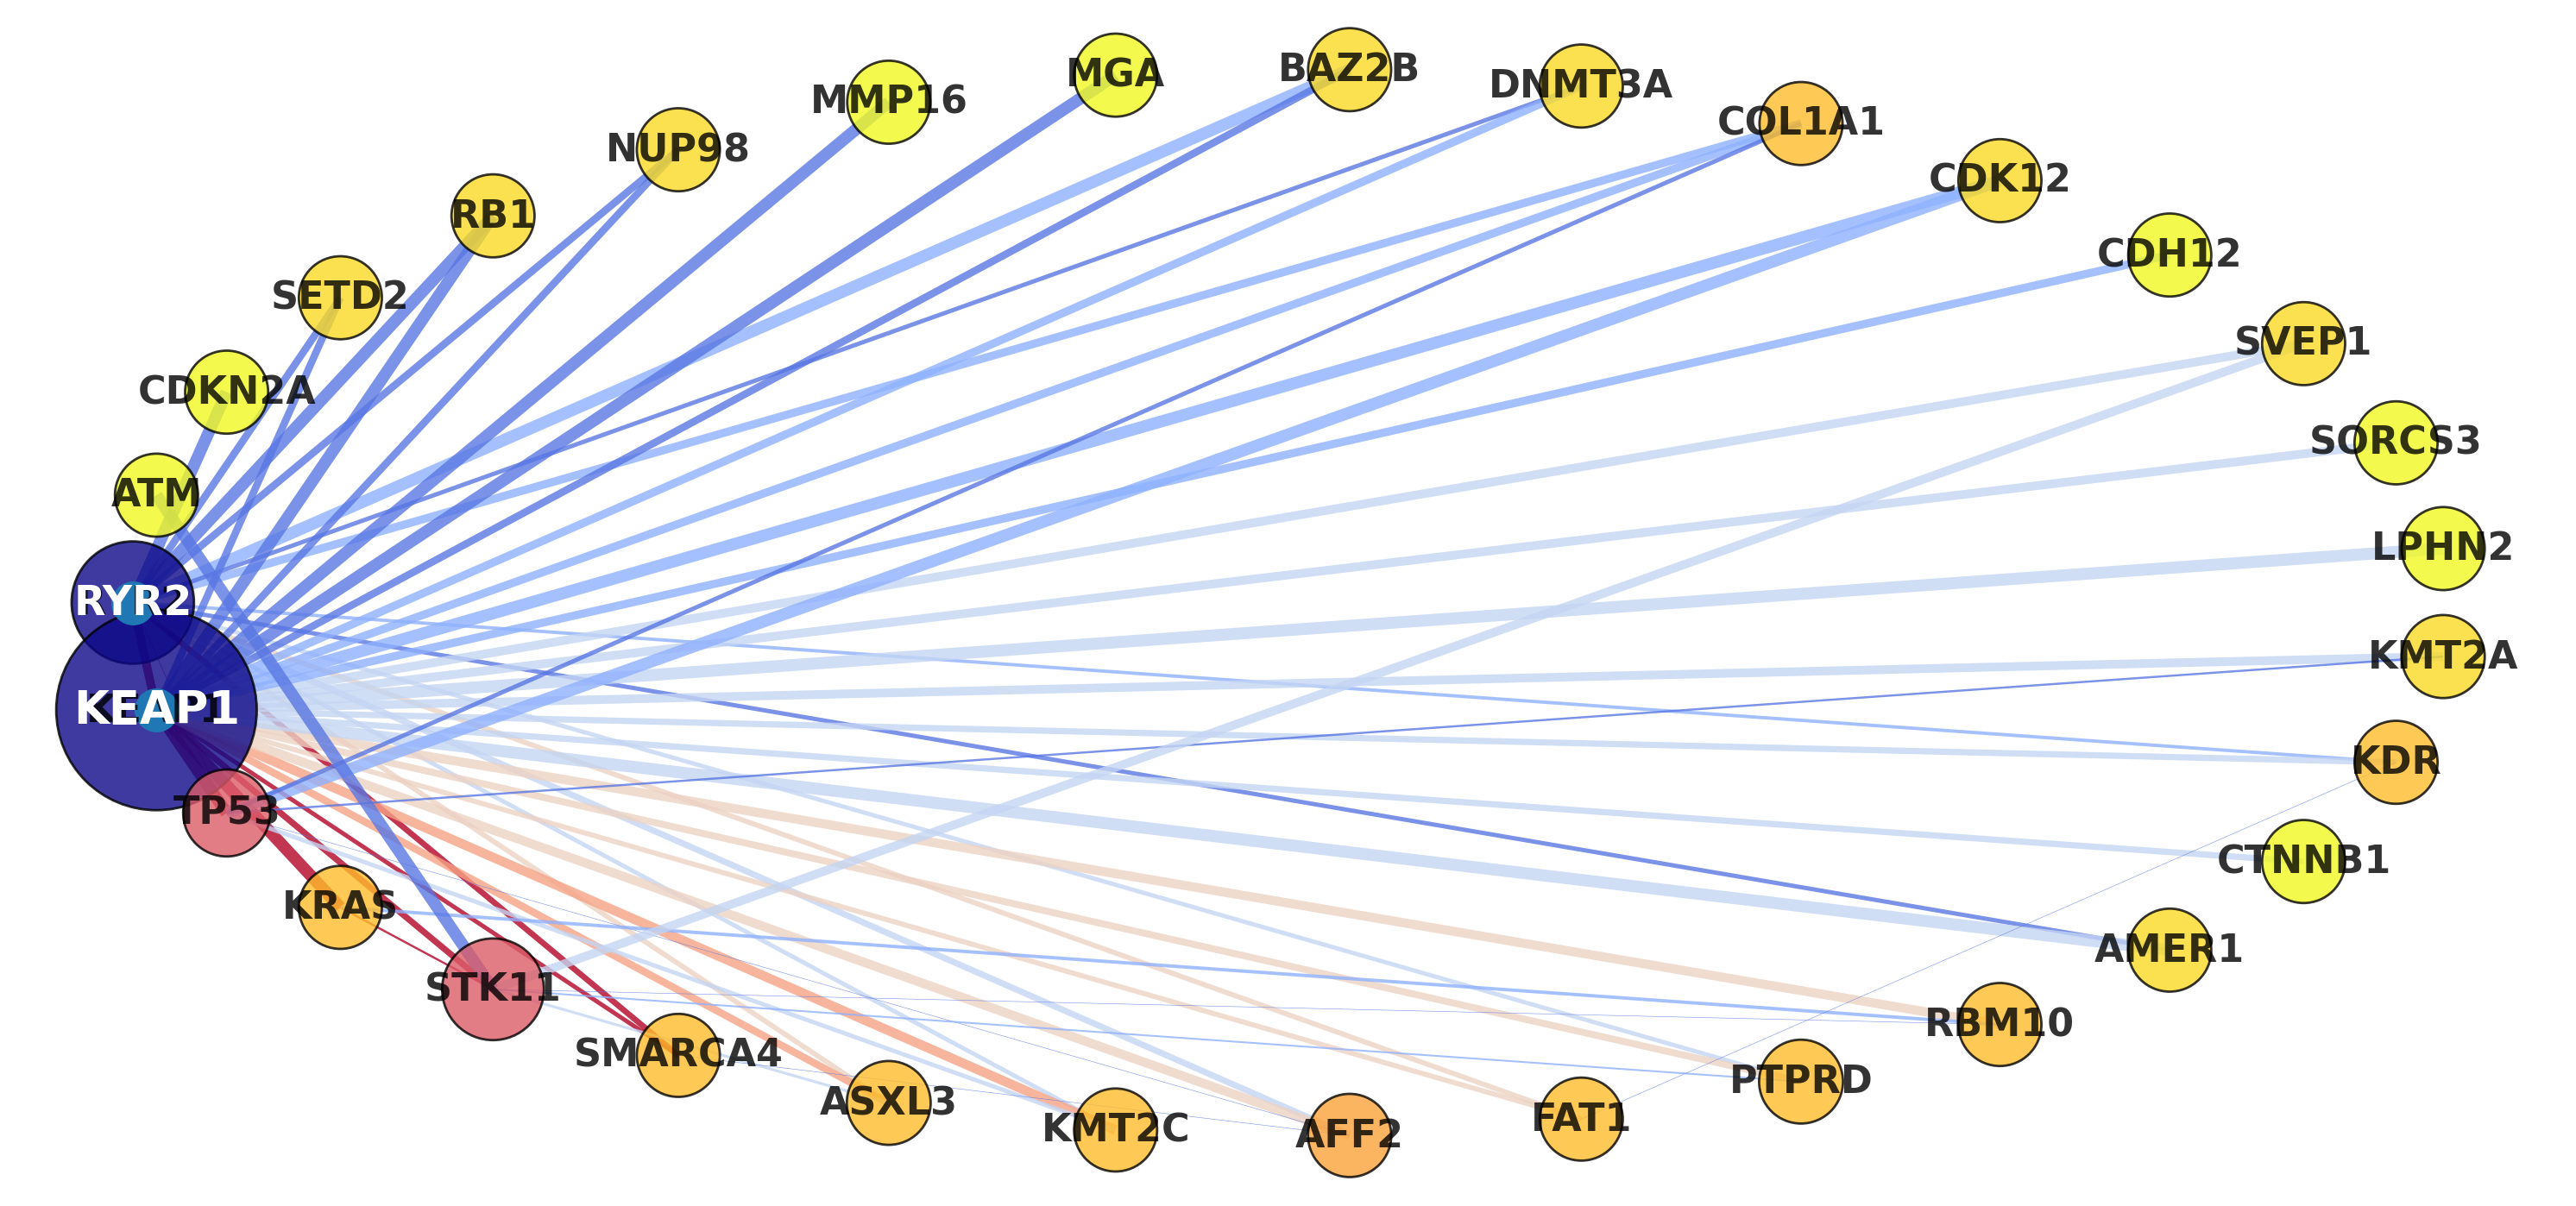

In [25]:
# use the matplotlib plasma colormap
graph_colormap1 = cm.get_cmap('plasma_r',15) #  #('viridis', 10) # no. of node degree
graph_colormap2 = cm.get_cmap('coolwarm') # support: low --> high [blue --> red]  #('seismic_r') #('coolwarm') #('gist_gray_r')

# node color varies with Degree
c = rescale([G3.degree(v) for v in G3],0,2) # v= node name, rescaled node degree to [0,0.9]
c = [graph_colormap1(i) for i in c]

# node size varies with betweeness centrality - map to range [10,100] 
bc = nx.betweenness_centrality(G3) # betweeness centrality
s =  rescale([v for v in bc.values()],1200,7000) # 1500,7000)

# edge color shows weight (= support score)
ec = rescale([float(G3[u][v]['weight']) for u,v in G3.edges],0.1,4) # 0.1,1)
ec = [graph_colormap2(i) for i in ec]

# edge width shows confident scores
ew = rescale([float(G3[u][v]['conf']) for u,v in G3.edges],0.2,5) #0.1,4)

##----------------------------
# Layout: https://networkx.org/documentation/stable/reference/drawing.html
# https://pelegm-networkx.readthedocs.io/en/latest/reference/generated/networkx.drawing.nx_pylab.draw_networkx_labels.html
# alpha = text transparent; font_family (string) – Font family (default=’sans-serif’)

pos = nx.shell_layout(G3) # circular_layout(G3) #kamada_kawai_layout(G3)
plt.figure(figsize=(19,9),facecolor='w', dpi=200) #facecolor=[0.7,0.7,0.7,0.4]
nx.draw_networkx(G3, pos=pos, with_labels=True, node_color=c, node_size=s,edge_color= ec,width=ew,
                 font_color='black',font_weight='bold',font_size='16',alpha=0.8,edgecolors='black', 
                 font_family='sans-serif') #default='sans-serif'
# draw subgraph for highlights
# Ref: https://stackoverflow.com/questions/59220877/highlight-a-node-in-draw-networkx-visualisation-without-changing-node-colour

nx.draw_networkx(G3.subgraph('KEAP1'), pos=pos,font_weight='bold',font_size=19, font_color='w')
nx.draw_networkx(G3.subgraph('RYR2'), pos=pos,font_weight='bold',font_size=17, font_color='w')
plt.axis('off')
#plt.show()
plt.savefig("./output/CO_network_cluster3.png") # save as png

#### Minimum spanning tree

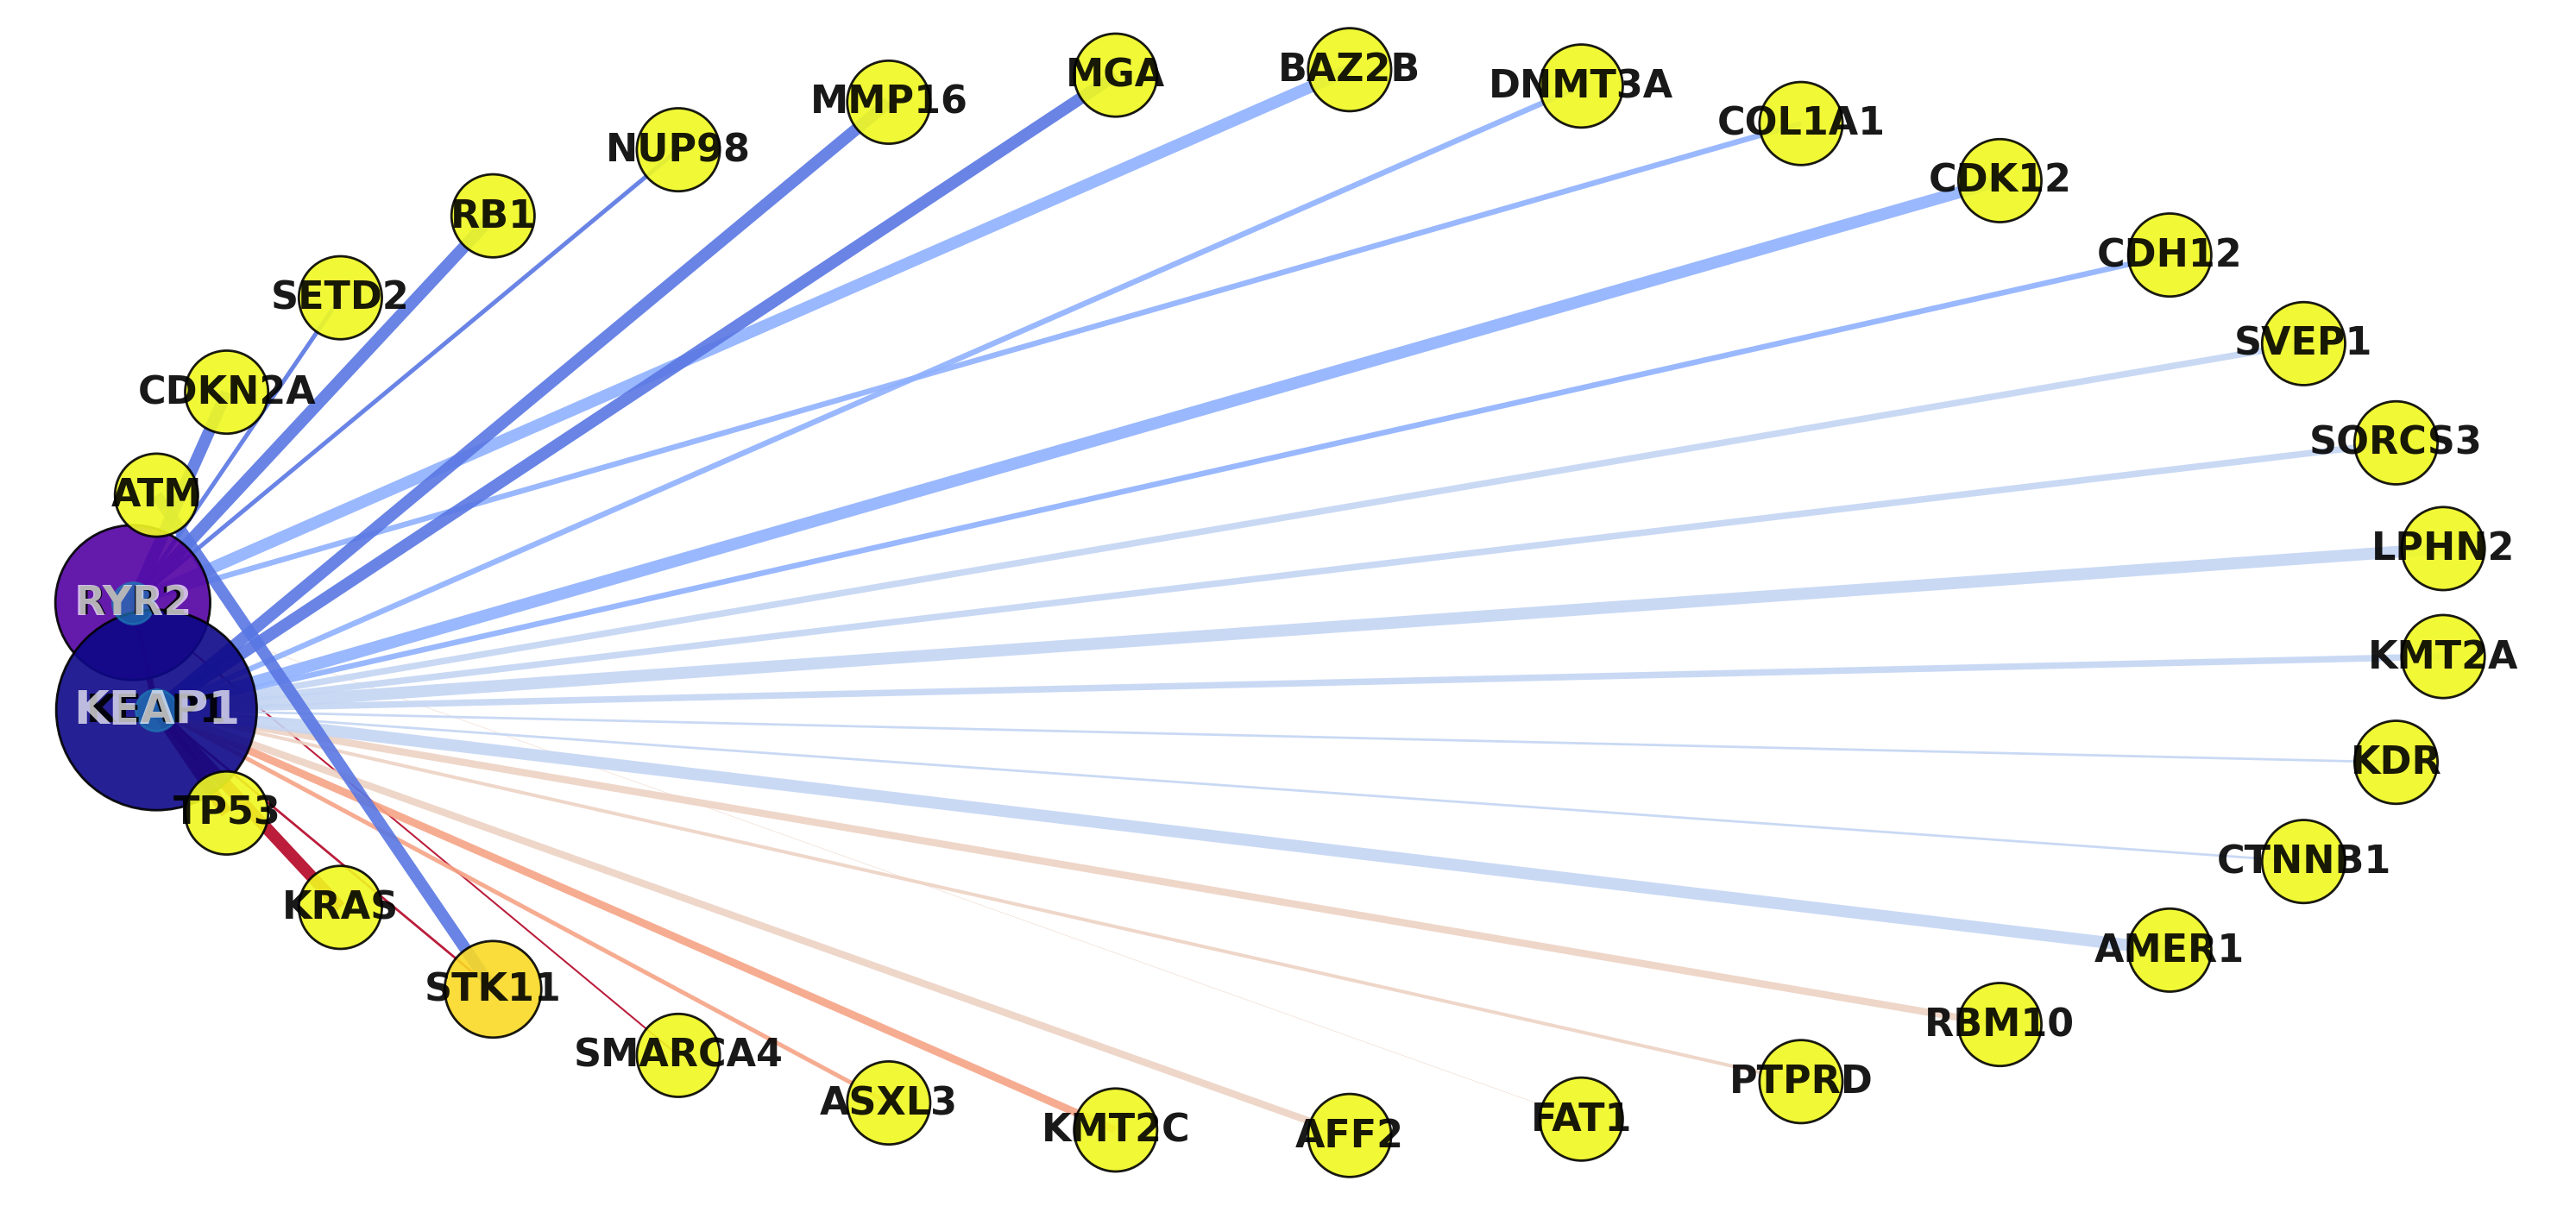

In [26]:
# Maximum_spanning_tree

# use the matplotlib plasma colormap
graph_colormap1 = cm.get_cmap('plasma_r',15) #  #('viridis', 10) # no. of node degree
graph_colormap2 = cm.get_cmap('coolwarm') # ('gist_gray_r') support: low --> high [blue --> red]  #('seismic_r') #'coolwarm'

##----------------------------
T3 = nx.maximum_spanning_tree(G3, weight='weight') # opposite to nx.minimum_spanning_tree(G2)
##--------------
# node color varies with Degree
c = rescale([T3.degree(v) for v in T3],0,2) # v= node name, rescaled node degree to [0,0.9]
c = [graph_colormap1(i) for i in c]

# node size varies with betweeness centrality - map to range [10,100] 
bc = nx.betweenness_centrality(T3) # betweeness centrality
s =  rescale([v for v in bc.values()],1200,7000) # 1500,7000)

# edge color shows weight (= support score)
ec = rescale([float(T3[u][v]['weight']) for u,v in T3.edges],0.1,4) # 0.1,1)
ec = [graph_colormap2(i) for i in ec]

# edge width shows confident scores
ew = rescale([float(T3[u][v]['conf']) for u,v in T3.edges],0.2,5) #0.1,4)
##--------------

pos = nx.shell_layout(T3)
plt.figure(figsize=(19,9),facecolor='w', dpi=200)
nx.draw_networkx(T3, pos=pos, with_labels=True, node_color=c, node_size=s,edge_color= ec,width=ew,
                 font_color='black',font_weight='bold',font_size='16',alpha=0.9,edgecolors='black', 
                 font_family='sans-serif') #default='sans-serif'
# draw subgraph for highlights
# Ref: https://stackoverflow.com/questions/59220877/highlight-a-node-in-draw-networkx-visualisation-without-changing-node-colour

nx.draw_networkx(T3.subgraph('KEAP1'), pos=pos,font_weight='bold',font_size=19,alpha=0.7, font_color='w')
nx.draw_networkx(T3.subgraph('RYR2'), pos=pos,font_weight='bold',font_size=17,alpha=0.7, font_color='w')
plt.axis('off')
plt.show()

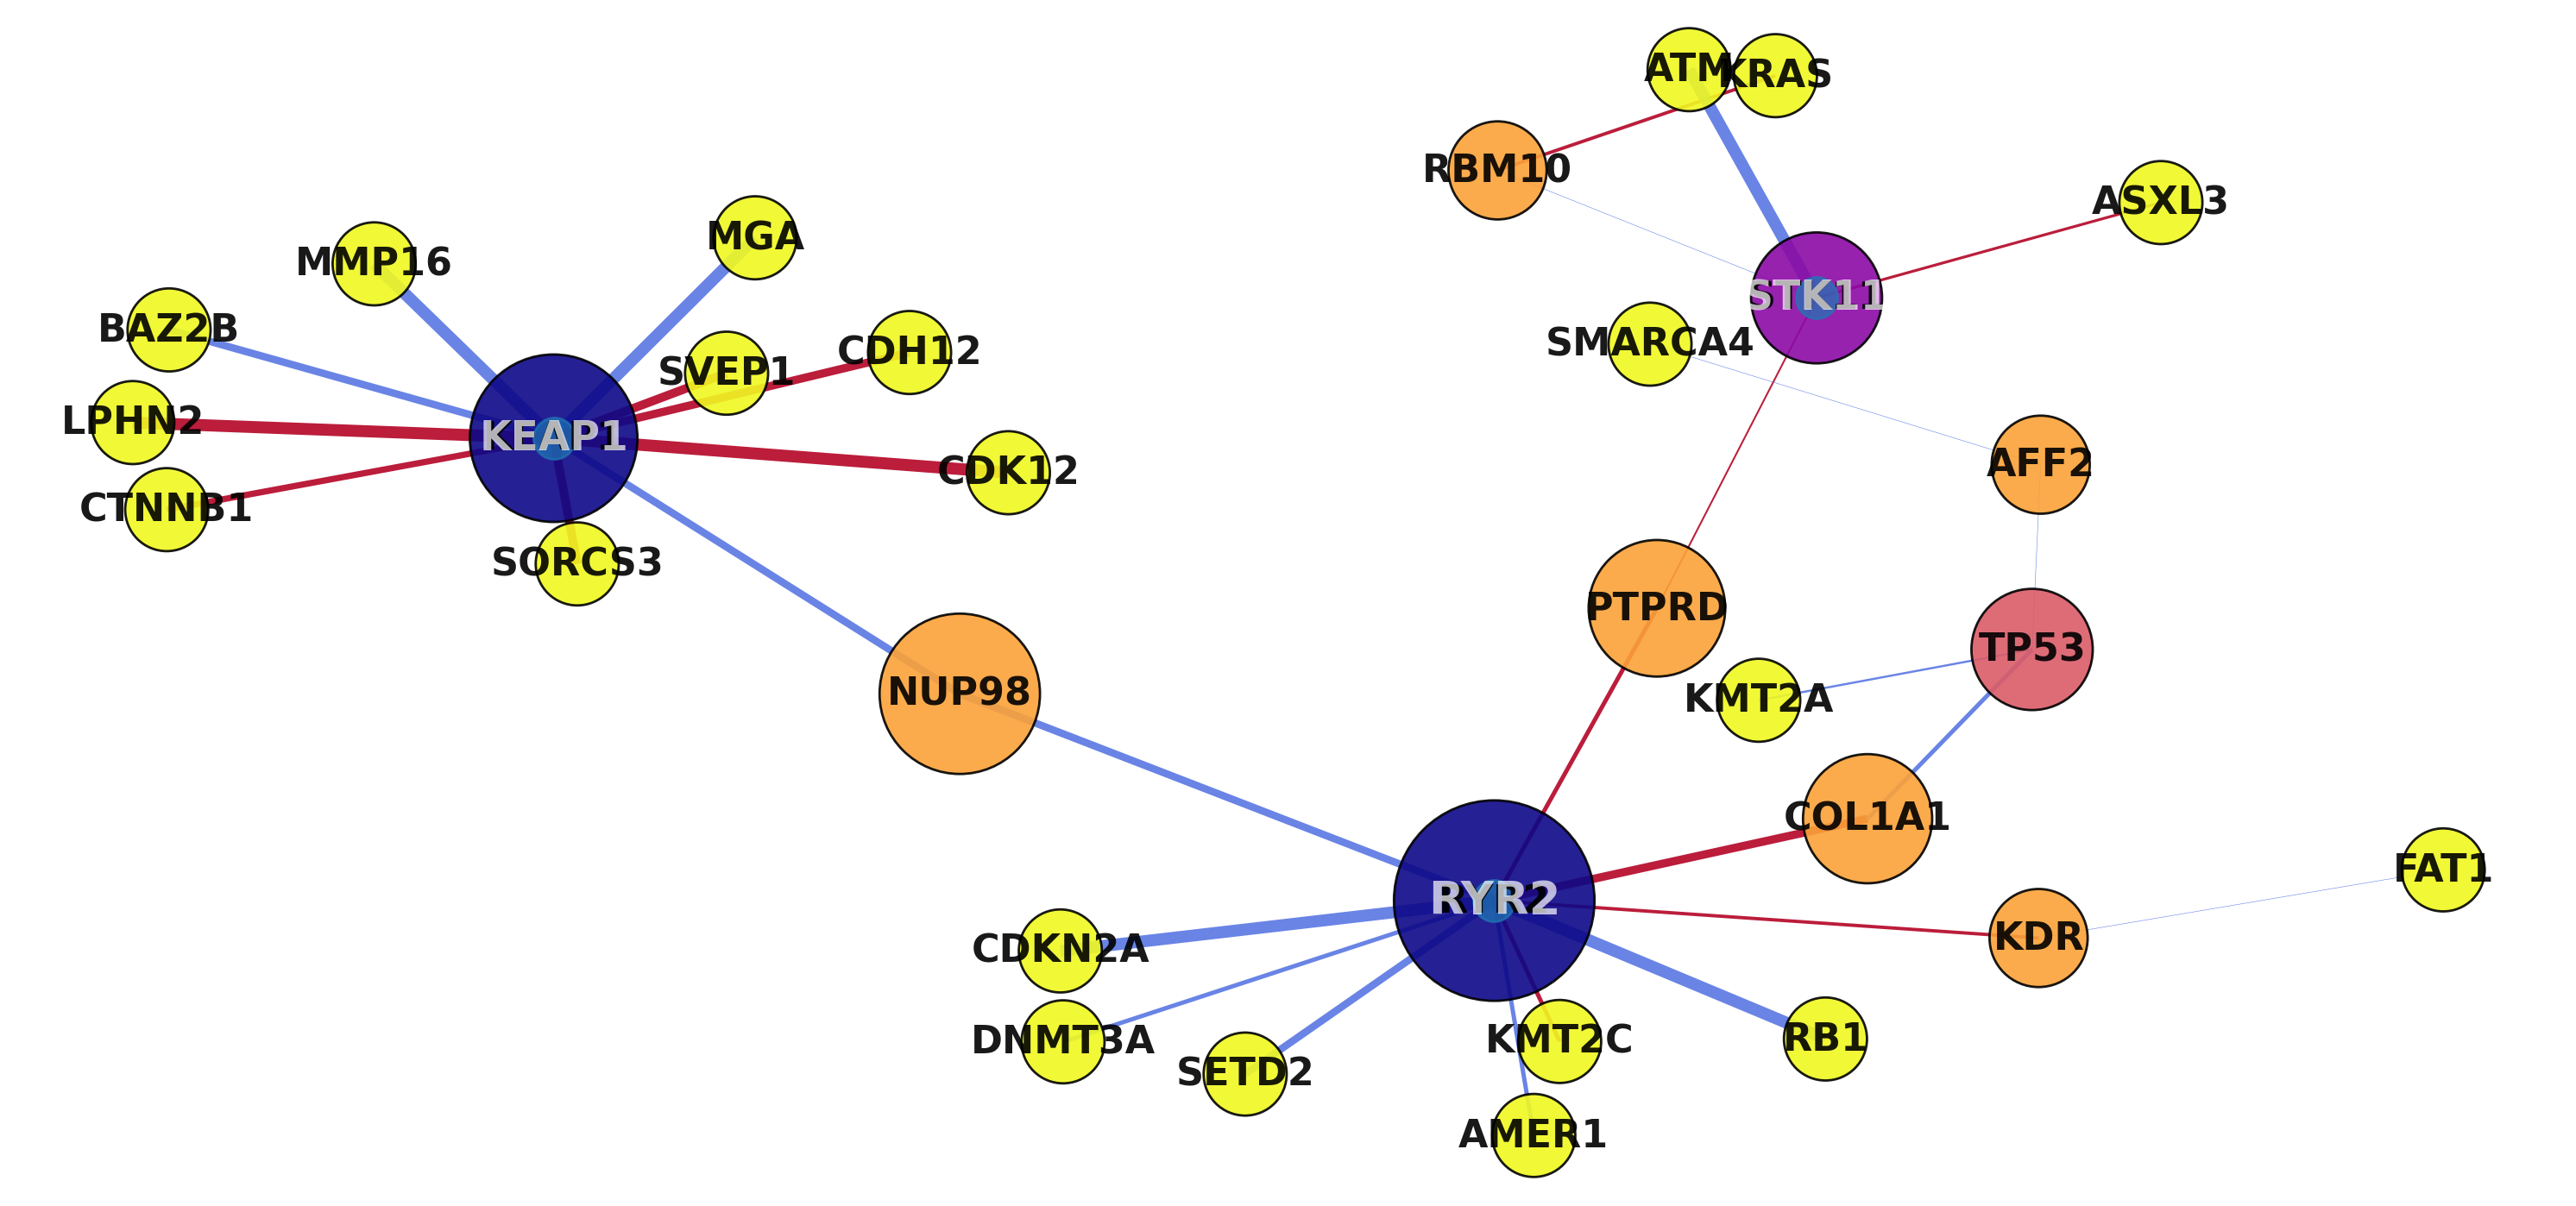

In [27]:
# Minimum_spanning_tree
# use the matplotlib plasma colormap
graph_colormap1 = cm.get_cmap('plasma_r',15) #  #('viridis', 10) # no. of node degree
graph_colormap2 = cm.get_cmap('coolwarm') # ('gist_gray_r') support: low --> high [blue --> red]  #('seismic_r') #'coolwarm'

##----------------------------
T33 = nx.minimum_spanning_tree(G3, weight='weight') # opposite to nx.maximum_spanning_tree(G1)
##--------------
# node color varies with Degree
c = rescale([T33.degree(v) for v in T33],0,2) # v= node name, rescaled node degree to [0,0.9]
c = [graph_colormap1(i) for i in c]

# node size varies with betweeness centrality - map to range [10,100] 
bc = nx.betweenness_centrality(T33) # betweeness centrality
s =  rescale([v for v in bc.values()],1200,7000) # 1500,7000)

# edge color shows weight (= support score)
ec = rescale([float(T33[u][v]['weight']) for u,v in T33.edges],0.1,4) # 0.1,1)
ec = [graph_colormap2(i) for i in ec]

# edge width shows confident scores
ew = rescale([float(T33[u][v]['conf']) for u,v in T33.edges],0.2,5) #0.1,4)
##--------------

pos = nx.spring_layout(T33) # shell_layout
plt.figure(figsize=(19,9),facecolor='w', dpi=200)
nx.draw_networkx(T33, pos=pos, with_labels=True, node_color=c, node_size=s,edge_color= ec,width=ew,
                 font_color='black',font_weight='bold',font_size='16',alpha=0.9,edgecolors='black', 
                 font_family='sans-serif') #default='sans-serif'
# draw subgraph for highlights
# Ref: https://stackoverflow.com/questions/59220877/highlight-a-node-in-draw-networkx-visualisation-without-changing-node-colour

nx.draw_networkx(T33.subgraph('RYR2'), pos=pos,font_weight='bold',font_size=19,alpha=0.7, font_color='w')
nx.draw_networkx(T33.subgraph('KEAP1'), pos=pos,font_weight='bold',font_size=17,alpha=0.7, font_color='w')
nx.draw_networkx(T33.subgraph('STK11'), pos=pos,font_weight='bold',font_size=17,alpha=0.7, font_color='w')

plt.axis('off')
plt.show()